DTMF – Гусев Иван; РТиМО 1 курс

In [83]:
import math
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [3]:
def goertzel(audio, target_frequency, sample_rate):
    N = len(audio)
    k = int((N * target_frequency) / sample_rate)
    omega = (2 * math.pi * k) / N
    s_prev1 = 0
    s_prev2 = 0

    for sample in audio:
        s = sample + 2 * math.cos(omega) * s_prev1 - s_prev2
        s_prev1 = s
        s_prev2 = s_prev1
    
    Xk_power = s_prev1 ** 2 - 2 * math.cos(omega) * s_prev1 * s_prev2 + s_prev2 ** 2
    Xk = math.sqrt(Xk_power)

    return Xk

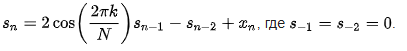

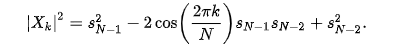

Матрица DTMF

In [78]:
sr = librosa.get_samplerate("DTMF_Lab3.wav")
sound, _ = librosa.load("DTMF_Lab3.wav", sr=sr)

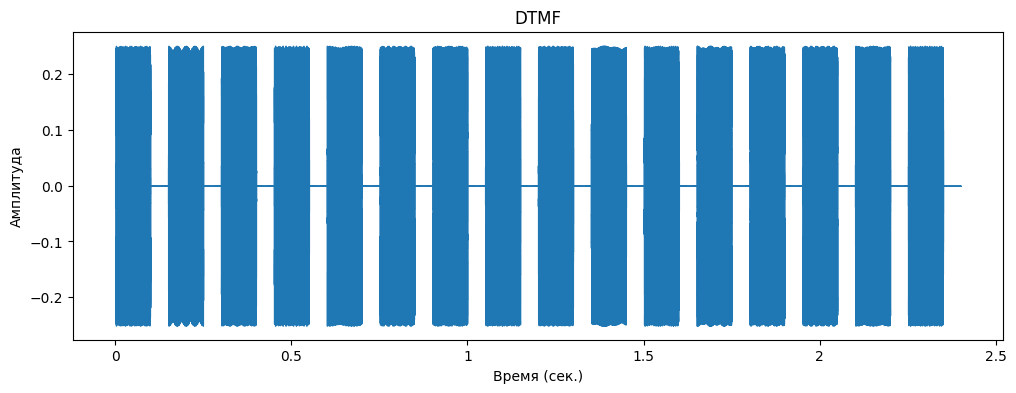

In [79]:
# Амплитуда
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('DTMF')
plt.xlabel('Время (сек.)')
plt.ylabel('Амплитуда')
plt.show()

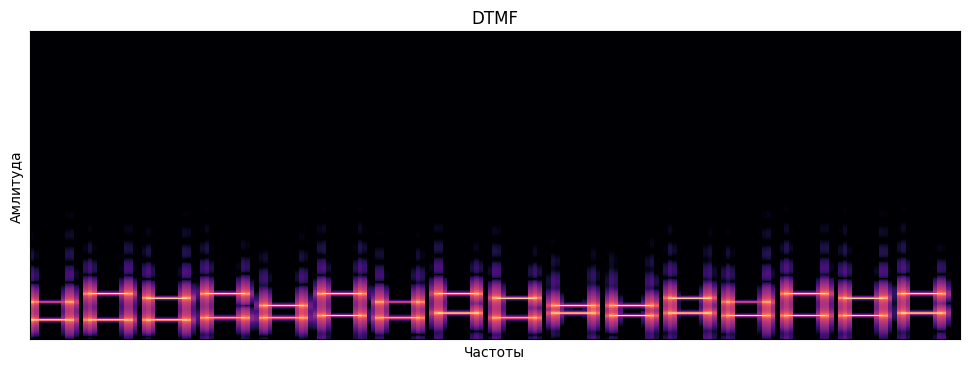

In [84]:
# Спектр
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr)
plt.title('DTMF')
plt.xlabel("Частоты")
plt.ylabel("Амлитуда")
plt.show()

In [31]:
  low_freqs = {697: 'row1', 770: 'row2', 852: 'row3', 941: 'row4'}
  high_freqs = {1209: 'col1', 1336: 'col2', 1477: 'col3', 1633: 'col4'}
  dtmf_matrix = {
      'row1': {'col1': '1', 'col2': '2', 'col3': '3', 'col4': 'A'},
      'row2': {'col1': '4', 'col2': '5', 'col3': '6', 'col4': 'B'},
      'row3': {'col1': '7', 'col2': '8', 'col3': '9', 'col4': 'C'},
      'row4': {'col1': '*', 'col2': '0', 'col3': '#', 'col4': 'D'},
  }

In [ ]:
sound_samples = 0.2 * sr
pause_samples = 0.1 * sr

for sample_start in range(0, len(sound), int(sound_samples + pause_samples)):
    sound_part = sound[sample_start: sample_start + int(sound_samples)]
    low_l = []
    for low in low_freqs.keys():
        Xk = goertzel(sound_part, low, sr)
        low_l.append(Xk)
    high_l = []
    for high in high_freqs.keys():
        Xk = goertzel(sound_part, high, sr)
        high_l.append(Xk)
    
    row = low_freqs[list(low_freqs.keys())[low_l.index(max(low_l))]]
    col = high_freqs[list(high_freqs.keys())[high_l.index(max(high_l))]]
    
    number = dtmf_matrix[row][col]
    print(number)

*
A
D
D
D
A
D
0
D
D
D
#
0
A
D
0
